In [49]:
import pandas as pd
import numpy as np
import riskfolio as rp
import matplotlib.pyplot as plt
import pypfopt as ppo
import sqlite3
import os

In [50]:
ibov_close = pd.read_csv('./data/ativos_ibov/ivob_close.csv')

threshold = len(ibov_close)
ibov_close.dropna(thresh=threshold, axis=1, inplace=True)

ibov_close['Date'] = pd.to_datetime(ibov_close['Date'])

ibov_close.set_index('Date', inplace=True)
ibov_close

,BBAS3.SA,BBDC3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,CMIG4.SA,CPFE3.SA,CPLE6.SA,CSNA3.SA,CYRE3.SA,...,GOAU4.SA,ITSA4.SA,PETR3.SA,PETR4.SA,SBSP3.SA,TRPL4.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.493556,1.018616,0.767667,749.570984,1384.787354,2527.665527,0.110521,0.561978,1.707281,0.346407,...,141.599884,0.396037,1.333409,1.364051,4.741245,2120.581055,1.459322,1.436180,7.079099,0.119891
2000-01-04,0.470082,0.944535,0.712833,744.739929,1350.556885,2401.087891,0.130615,0.540104,1.731846,0.346407,...,136.717087,0.358225,1.258575,1.288593,4.460146,1851.301025,1.406117,1.401985,6.887372,0.115684
2000-01-05,0.474898,0.976636,0.767667,744.739929,1356.780884,2414.137695,0.130615,0.545152,1.824843,0.346407,...,134.764023,0.388077,1.275583,1.275591,4.336030,2053.260254,1.539888,1.401985,6.964061,0.115684
2000-01-06,0.481518,0.991453,0.767667,725.393677,1425.242065,2446.106934,0.130615,0.535056,1.907312,0.346407,...,136.228867,0.394047,1.265378,1.271180,4.314290,2022.967041,1.679740,1.401985,7.117442,0.105167
2000-01-07,0.470684,1.008738,0.767667,725.393677,1462.585083,2453.285156,0.140663,0.530009,1.895030,0.346407,...,136.717087,0.392057,1.275583,1.276984,4.374958,1952.280518,1.746625,1.453277,7.152839,0.105167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,27.180000,12.893271,20.219999,23.650000,19.930000,11.400000,33.930000,10.020653,12.890000,20.520000,...,10.920000,11.070000,39.270000,36.009998,90.400002,24.299999,6.240000,63.509998,55.820000,54.389999
2024-10-01,27.080000,12.962749,20.230000,24.280001,20.040001,11.420000,33.860001,10.060000,13.050000,20.610001,...,10.870000,10.890000,40.320000,36.970001,90.029999,24.260000,6.240000,63.820000,55.570000,55.880001
2024-10-02,27.150000,13.380000,20.280001,23.860001,20.280001,11.400000,33.950001,10.150000,13.300000,21.540001,...,11.100000,10.930000,40.790001,37.480000,90.110001,24.430000,6.310000,64.169998,56.090000,55.349998


In [51]:
returns = ibov_close.pct_change().dropna()
returns

,BBAS3.SA,BBDC3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,CMIG4.SA,CPFE3.SA,CPLE6.SA,CSNA3.SA,CYRE3.SA,...,GOAU4.SA,ITSA4.SA,PETR3.SA,PETR4.SA,SBSP3.SA,TRPL4.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.047562,-0.072727,-0.071429,-0.006445,-0.024719,-0.050077,0.181818,-0.038923,0.014388,0.000000,...,-0.034483,-0.095477,-0.056122,-0.055319,-0.059288,-0.126984,-0.036458,-0.023810,-0.027084,-0.035093
2000-01-05,0.010245,0.033987,0.076923,0.000000,0.004608,0.005435,0.000000,0.009346,0.053698,0.000000,...,-0.014285,0.083335,0.013514,-0.010090,-0.027828,0.109090,0.095135,0.000000,0.011135,0.000000
2000-01-06,0.013941,0.015171,0.000000,-0.025977,0.050459,0.013243,0.000000,-0.018519,0.045192,0.000000,...,0.010870,0.015384,-0.008000,-0.003458,-0.005014,-0.014754,0.090819,0.000000,0.022025,-0.090911
2000-01-07,-0.022499,0.017434,0.000000,0.000000,0.026201,0.002935,0.076922,-0.009434,-0.006440,0.000000,...,0.003584,-0.005052,0.008065,0.004566,0.014062,-0.034942,0.039819,0.036585,0.004973,0.000000
2000-01-10,0.054987,0.004896,0.000000,0.100000,0.021277,-0.018617,0.014287,0.028572,0.012037,0.021739,...,0.046429,0.035534,0.029334,0.020546,0.063154,0.067242,0.103568,0.082354,0.061855,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,-0.002569,-0.011329,-0.003941,-0.025144,-0.018710,0.007067,0.005036,0.000000,-0.027170,-0.008696,...,0.004600,-0.007175,-0.006326,-0.002769,0.003552,0.003303,0.000000,-0.007036,0.003957,-0.028055
2024-10-01,-0.003679,0.005389,0.000495,0.026639,0.005519,0.001754,-0.002063,0.003927,0.012413,0.004386,...,-0.004579,-0.016260,0.026738,0.026659,-0.004093,-0.001646,0.000000,0.004881,-0.004479,0.027395
2024-10-02,0.002585,0.032188,0.002472,-0.017298,0.011976,-0.001751,0.002658,0.008946,0.019157,0.045124,...,0.021159,0.003673,0.011657,0.013795,0.000889,0.007007,0.011218,0.005484,0.009358,-0.009485


In [52]:
# Building the portfolio object
port = rp.Portfolio(returns=returns)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,BBAS3.SA,BBDC3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,CMIG4.SA,CPFE3.SA,CPLE6.SA,CSNA3.SA,CYRE3.SA,...,GOAU4.SA,ITSA4.SA,PETR3.SA,PETR4.SA,SBSP3.SA,TRPL4.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
weights,4.136596e-09,0.037833,5.355413e-09,0.099461,0.000026,2.521513e-09,0.000873,0.016084,1.488918e-09,0.004755,...,4.815749e-09,0.012475,5.607967e-09,8.369063e-09,0.043115,0.106527,1.714216e-09,0.08065,0.275714,0.238006


In [55]:
import holidays

# Define Brazilian holidays
brazil_holidays = holidays.Brazil()

# Filter the data for the first 10 years
first_year_data = ibov_close.loc['2000-01-01':'2010-12-31']

# Initialize an empty dataframe to store the weights
weights_df = pd.DataFrame()

# Loop through each month and calculate the weights
for month in pd.date_range(start='2000-01-01', end='2010-12-31', freq='ME'):
    # Adjust the date to the next business day if it falls on a weekend or holiday
    while month.weekday() >= 5 or month in brazil_holidays or month.is_year_end:  # 5 = Saturday, 6 = Sunday
        month += pd.offsets.BDay(1)
    
    # Get the data for the current month
    monthly_data = first_year_data.loc[:month.strftime('%Y-%m-%d')]
    
    # Calculate returns for the current month
    monthly_returns = monthly_data.pct_change().dropna()
    
    # Build the portfolio object
    port = rp.Portfolio(returns=monthly_returns)
    
    # Calculate optimal portfolio
    port.assets_stats(method_mu=method_mu, method_cov=method_cov)
    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    
    # Store the weights in the dataframe
    w = w.T
    w['Date'] = month
    w.set_index('Date', inplace=True)
    weights_df = pd.concat([weights_df, w])

# Display the weights dataframe
weights_df

You must convert self.cov to a positive definite matrix


,BBAS3.SA,BBDC3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,CMIG4.SA,CPFE3.SA,CPLE6.SA,CSNA3.SA,CYRE3.SA,...,GOAU4.SA,ITSA4.SA,PETR3.SA,PETR4.SA,SBSP3.SA,TRPL4.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,1.056487e-01,2.307020e-10,5.318593e-02,5.844786e-11,0.062750,1.516100e-02,0.175339,1.479111e-10,3.593768e-02,0.091576,...,0.200870,1.790006e-10,2.808386e-10,5.682757e-02,2.787488e-10,6.460927e-11,5.954642e-11,7.792231e-11,1.189329e-10,0.151958
2000-02-29,6.127133e-02,7.319507e-09,9.628519e-03,1.071882e-09,0.011895,5.274134e-02,0.205605,2.353732e-02,1.593677e-08,0.143389,...,0.165115,1.428689e-02,8.032770e-02,3.543424e-02,2.406483e-02,3.750107e-09,3.952879e-10,4.868700e-10,1.351166e-09,0.096463
2000-03-31,5.592970e-02,8.895815e-10,3.746511e-02,3.050034e-02,0.023094,8.375175e-02,0.186657,1.186963e-08,2.942862e-02,0.120131,...,0.085805,2.092715e-09,7.373299e-02,6.682440e-03,4.523299e-02,2.157195e-10,1.607012e-10,3.209459e-10,2.691275e-09,0.135481
2000-05-02,4.883141e-02,5.158913e-10,9.879860e-10,2.019084e-01,0.044607,4.061851e-02,0.006927,5.274114e-10,5.112748e-02,0.072943,...,0.138269,3.028769e-10,7.234966e-02,7.238396e-10,1.865162e-09,1.405368e-10,3.183733e-10,6.088034e-10,1.249412e-02,0.234956
2000-05-31,9.927885e-02,9.734626e-10,2.519916e-02,1.914180e-01,0.027024,1.741637e-09,0.007391,6.414596e-10,6.602440e-02,0.097905,...,0.092760,6.337032e-10,5.962439e-02,1.150838e-02,1.665390e-09,1.969087e-10,5.667857e-10,1.599780e-09,2.503167e-02,0.252270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,1.005209e-09,3.959774e-02,7.412798e-10,1.151093e-01,0.000019,4.208804e-04,0.000156,1.669039e-02,5.029648e-10,0.029139,...,0.013577,1.187111e-09,7.161252e-03,5.434295e-02,3.715171e-02,3.130520e-02,3.437265e-10,4.356033e-02,2.496150e-01,0.253388
2010-09-30,1.226558e-09,3.951211e-02,9.031469e-10,1.153332e-01,0.000019,4.270397e-04,0.000159,1.681352e-02,6.206891e-10,0.028967,...,0.014464,1.464959e-09,7.879591e-03,5.310175e-02,3.672038e-02,3.145373e-02,4.266905e-10,4.333381e-02,2.495215e-01,0.253496
2010-11-01,1.311319e-09,3.891207e-02,9.780101e-10,1.156898e-01,0.000019,4.206463e-04,0.000161,1.700682e-02,6.766802e-10,0.029243,...,0.014598,1.591248e-09,8.189622e-03,5.262571e-02,3.607013e-02,3.163741e-02,4.630317e-10,4.353869e-02,2.498242e-01,0.253039


In [56]:
# Filter returns to have the same dates as weights_df
filtered_returns = returns.loc[weights_df.index]
filtered_returns

,BBAS3.SA,BBDC3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,CMIG4.SA,CPFE3.SA,CPLE6.SA,CSNA3.SA,CYRE3.SA,...,GOAU4.SA,ITSA4.SA,PETR3.SA,PETR4.SA,SBSP3.SA,TRPL4.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-0.001264,-0.009435,0.000000,-0.092308,-0.050000,-0.042254,0.000000,-0.051948,-0.025000,-0.018182,...,0.000000,-0.034089,0.017964,-0.016769,0.010114,0.013258,-0.009434,0.000000,-0.019986,-0.017860
2000-02-29,-0.026144,-0.024837,0.000000,0.000000,-0.024390,-0.030233,0.000000,0.001244,0.000000,0.054546,...,0.005988,-0.024097,-0.004640,0.004347,-0.008454,0.000000,0.005291,-0.051163,0.005780,0.000000
2000-03-31,0.004792,0.031329,0.000000,0.000000,0.000000,-0.000983,0.000000,0.003401,0.017348,0.000000,...,0.000000,0.011906,0.000000,0.012875,0.050697,0.038043,-0.013683,0.026167,-0.019354,0.000000
2000-05-02,0.031666,-0.024837,0.000000,0.000000,-0.038461,-0.021455,0.000000,0.040449,-0.004412,0.000000,...,-0.997579,-0.051611,0.007500,0.024182,-0.026458,-0.037626,0.019868,0.002750,0.066271,0.000000
2000-05-31,-0.047619,0.021157,0.000000,0.107411,0.006410,-0.037671,0.000000,0.027972,-0.008674,0.000000,...,-0.044118,-0.013245,0.015037,-0.014673,-0.022731,0.134069,-0.012346,0.007711,-0.021352,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,0.030018,0.021946,0.002740,0.070455,0.204669,0.017745,-0.039327,0.037787,-0.002965,-0.049630,...,0.002848,0.031879,-0.016943,0.023969,-0.002686,0.000000,0.000682,0.016258,0.016556,-0.015064
2010-09-30,0.017416,0.018903,0.000742,0.000000,0.034317,0.021587,0.001035,-0.006666,-0.000681,-0.022449,...,-0.005460,0.017322,-0.017771,-0.007637,0.013369,0.008738,0.006652,0.002108,0.021345,0.000000
2010-11-01,0.017523,0.021899,0.017540,0.000000,0.003440,0.003341,0.005265,-0.002501,-0.002478,-0.051064,...,0.013746,0.006672,0.019264,0.024758,0.037746,0.000755,0.012247,0.022388,-0.000257,0.029131


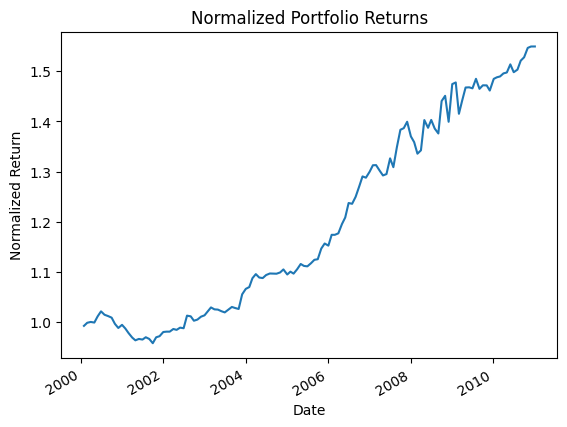

In [57]:
# Calculate the portfolio returns
portfolio_returns = (filtered_returns * weights_df).sum(axis=1)

# Normalize the portfolio returns to start at 1
normalized_portfolio_returns = (1 + portfolio_returns).cumprod()

# Plot the normalized portfolio returns
normalized_portfolio_returns.plot(title='Normalized Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Normalized Return')
plt.show()

In [61]:
# Generate a binary array with 150 ones randomly distributed
binary_array = np.zeros(len(ibov_close.index), dtype=int)
binary_array[:150] = 1
np.random.shuffle(binary_array)

# Combine the binary array with the dates
rebalancing_dates = ibov_close.index[binary_array == 1]

# Filter the data for the first 10 years
first_ten_years_data = ibov_close.loc['2000-01-01':'2010-12-31']

# Initialize an empty dataframe to store the weights
new_weights_df = pd.DataFrame()

# Loop through each rebalancing date and calculate the weights
for date in rebalancing_dates:
    if date > pd.Timestamp('2010-12-31'):
        continue
    
    # Get the data up to the current rebalancing date
    rebalancing_data = first_ten_years_data.loc[:date.strftime('%Y-%m-%d')]
    
    # Calculate returns for the current period
    rebalancing_returns = rebalancing_data.pct_change().dropna()
    
    # Build the portfolio object
    port = rp.Portfolio(returns=rebalancing_returns)
    
    # Calculate optimal portfolio
    port.assets_stats(method_mu=method_mu, method_cov=method_cov)
    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    
    # Store the weights in the dataframe
    w = w.T
    w['Date'] = date
    w.set_index('Date', inplace=True)
    new_weights_df = pd.concat([weights_df, w])

# Display the weights dataframe
new_weights_df

,BBAS3.SA,BBDC3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,CMIG4.SA,CPFE3.SA,CPLE6.SA,CSNA3.SA,CYRE3.SA,...,GOAU4.SA,ITSA4.SA,PETR3.SA,PETR4.SA,SBSP3.SA,TRPL4.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-03,7.380078e-02,2.735134e-09,3.136613e-02,9.425774e-10,0.050140,0.034742,0.185828,2.499676e-09,1.762114e-02,0.086929,...,0.199586,6.772717e-09,4.535906e-09,0.117557,4.771033e-09,1.060495e-09,1.035459e-09,1.156342e-09,2.225979e-09,0.128480
2000-02-11,1.273625e-01,4.639107e-10,3.921340e-02,1.003681e-10,0.073435,0.044464,0.184693,3.054500e-10,1.653815e-02,0.096365,...,0.177701,3.275622e-10,5.217486e-10,0.006777,5.173310e-10,2.718182e-10,8.576474e-11,8.250826e-11,2.668121e-10,0.155804
2000-03-22,4.875146e-02,4.948852e-10,5.533026e-02,1.680658e-09,0.019459,0.036741,0.191819,3.610825e-02,2.261359e-02,0.126534,...,0.095007,1.933880e-08,3.134410e-02,0.086238,2.766673e-02,1.475571e-10,1.661151e-10,4.217618e-10,4.723194e-03,0.126259
2000-03-30,5.493921e-02,2.932058e-09,3.768332e-02,2.931867e-02,0.023334,0.084262,0.186385,2.628871e-07,2.985140e-02,0.119849,...,0.085708,6.249558e-09,7.194736e-02,0.006631,4.984775e-02,6.931076e-10,4.927432e-10,1.006661e-09,7.465573e-09,0.134982
2000-05-25,7.896537e-02,5.328656e-09,1.897133e-02,2.421782e-01,0.023581,0.006627,0.007212,2.806340e-09,6.597130e-02,0.089345,...,0.098790,2.811786e-09,5.348918e-02,0.003661,6.361564e-09,1.081836e-09,2.331058e-09,6.680160e-09,1.736650e-02,0.239108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-14,1.345427e-09,4.251175e-02,1.024886e-09,1.150897e-01,0.000019,0.000407,0.000138,1.405052e-02,6.851481e-10,0.028395,...,0.014835,1.532319e-09,4.333779e-03,0.056679,3.571965e-02,3.003815e-02,4.785287e-10,4.475719e-02,2.487207e-01,0.253672
2010-10-22,1.281531e-09,3.924436e-02,9.586214e-10,1.155417e-01,0.000019,0.000421,0.000160,1.677445e-02,6.592136e-10,0.028864,...,0.014527,1.547219e-09,8.079039e-03,0.053036,3.636056e-02,3.160442e-02,4.528753e-10,4.351435e-02,2.496895e-01,0.253267
2010-12-07,1.407986e-09,3.965720e-02,1.029156e-09,1.154956e-01,0.000020,0.000415,0.000164,1.746181e-02,7.187305e-10,0.028931,...,0.013342,1.702890e-09,7.969939e-03,0.052543,3.560600e-02,3.179348e-02,4.890354e-10,4.399464e-02,2.502885e-01,0.253127


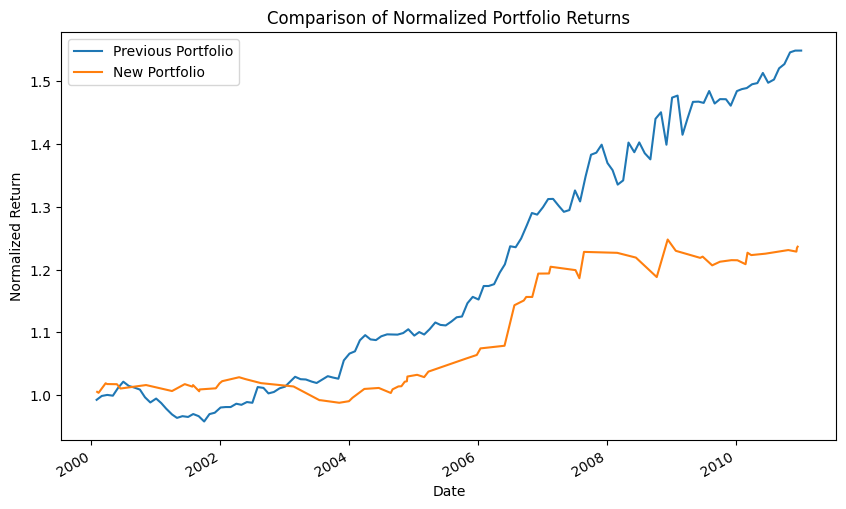

In [62]:
# Filter returns to have the same dates as weights_df
new_filtered_returns = returns.loc[new_weights_df.index]
new_filtered_returns

# Calculate the new portfolio returns
new_portfolio_returns = (new_filtered_returns * new_weights_df).sum(axis=1)

# Normalize the new portfolio returns to start at 1
new_normalized_portfolio_returns = (1 + new_portfolio_returns).cumprod()

# Plot both portfolios
plt.figure(figsize=(10, 6))
normalized_portfolio_returns.plot(label='Previous Portfolio')
new_normalized_portfolio_returns.plot(label='New Portfolio')
plt.title('Comparison of Normalized Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Normalized Return')
plt.legend()
plt.show()

C:\Users\loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\moment_helpers.py:252: RuntimeWarning: invalid value encountered in divide
  corr = cov / np.outer(std_, std_)


You must convert self.cov to a positive definite matrix


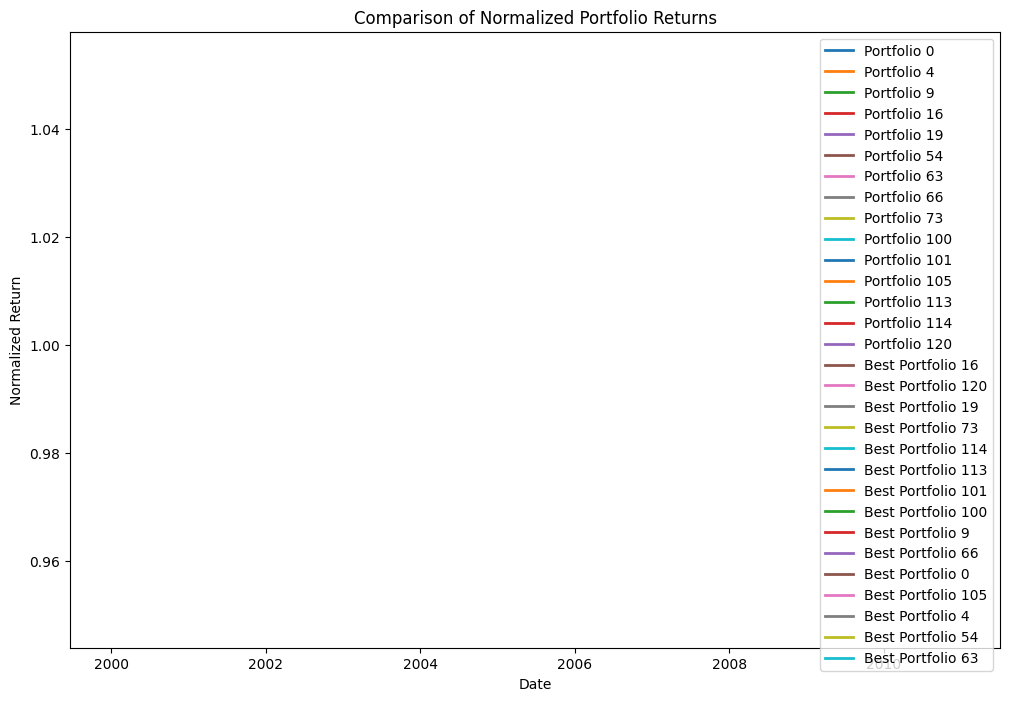

In [63]:
# Generate rebalancing dates with different frequencies
frequencies = [150, 200, 250]
rebalancing_dates = []

for freq in frequencies:
    binary_array = np.zeros(len(ibov_close.index), dtype=int)
    binary_array[:50] = 1
    np.random.shuffle(binary_array)
    rebalancing_dates.extend(ibov_close.index[binary_array == 1])

# Initialize a dictionary to store the portfolio returns
portfolio_returns_dict = {}

# Loop through each rebalancing date and calculate the weights and returns
for i, date in enumerate(rebalancing_dates):
    if date > pd.Timestamp('2010-12-31'):
        continue
    
    # Get the data up to the current rebalancing date
    rebalancing_data = first_ten_years_data.loc[:date.strftime('%Y-%m-%d')]
    
    # Calculate returns for the current period
    rebalancing_returns = rebalancing_data.pct_change().dropna()
    
    # Build the portfolio object
    port = rp.Portfolio(returns=rebalancing_returns)
    
    # Calculate optimal portfolio
    port.assets_stats(method_mu=method_mu, method_cov=method_cov)
    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    
    # Store the weights in the dataframe
    w = w.T
    w['Date'] = date
    w.set_index('Date', inplace=True)
    
    # Filter returns to have the same dates as weights
    filtered_returns = returns.loc[w.index]
    
    # Calculate the portfolio returns
    portfolio_returns = (filtered_returns * w).sum(axis=1)
    
    # Normalize the portfolio returns to start at 1
    normalized_portfolio_returns = (1 + portfolio_returns).cumprod()
    
    # Store the normalized portfolio returns in the dictionary
    portfolio_returns_dict[i] = normalized_portfolio_returns

# Find the best 15 portfolios with the highest return
final_returns = {i: returns.iloc[-1] for i, returns in portfolio_returns_dict.items()}
best_portfolios = sorted(final_returns, key=final_returns.get, reverse=True)[:15]

# Plot all portfolios
plt.figure(figsize=(12, 8))
for i, returns in portfolio_returns_dict.items():
    if i in best_portfolios:
        plt.plot(returns, label=f'Portfolio {i}', linewidth=2)
    else:
        plt.plot(returns, color='gray', alpha=0.5)

# Highlight the best 15 portfolios
for i in best_portfolios:
    plt.plot(portfolio_returns_dict[i], label=f'Best Portfolio {i}', linewidth=2)

plt.title('Comparison of Normalized Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Normalized Return')
plt.legend()
plt.show()

In [64]:
# Get the best portfolio index
best_portfolio_index = best_portfolios[0]

# Get the weights for the best portfolio
best_portfolio_weights = weights_df.loc[weights_df.index == best_portfolio_index]

# Get the returns for the best portfolio
best_portfolio_returns = returns.loc[best_portfolio_weights.index]

# Combine the weights and returns into a single dataframe
best_portfolio_df = best_portfolio_weights.join(best_portfolio_returns, rsuffix='_return')

# Display the dataframe
best_portfolio_df

ValueError: Other Series must have a name